In [1]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 1.6 MB/s eta 0:00:00


In [2]:
import math

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, log_loss, recall_score
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, classification_report, f1_score, recall_score, roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv('/content/drive/MyDrive/santander-customer-satisfaction/train.csv')

In [6]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
df.shape #371 columns initially

(76020, 371)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


We can see from the above data that the data is very messy, and it has alot of variables with improper values as well as recurrent values (0). We will fix this ahead before modelling.

In [9]:
df.isna().sum().sum() #There are no missing values

0

In [10]:
#We have data of 76020 clients
len(df.ID.unique())

76020

In [11]:
#We will be removing duplicate records, as all the clients are different, duplicate records will harm our analysis
df = df.drop("ID", axis=1)
original_records = df.shape[0]

df = df.drop_duplicates()
print(f"Dropped {original_records - df.shape[0]} duplicate records")

Dropped 4807 duplicate records


In [12]:
#Remaining number of samples:
df.shape[0]

71213

<AxesSubplot:xlabel='TARGET', ylabel='count'>

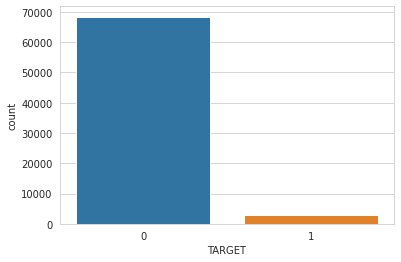

In [13]:
# Our main analysis is around the 'TARGET' variable, where if TARGET = 1 customer is dissatisfied and vice vera.
sns.set_style('whitegrid')
sns.countplot(x = 'TARGET', data = df)

As we can see our data is heavily imbalanced with most of the customers belonging to class 0 i.e most of the clients are satisified.

In [14]:
# Removing constant value features (zero variance features) from the dataset
const_col = []
for col in df.columns:
  if df[col].unique().shape[0] <= 1:
    const_col.append(col)
print(f'Removing {len(const_col)} features with constant values')
df = df.drop(const_col, axis = 1)

Removing 34 features with constant values


In [15]:
#Number of features now
df.shape[1]

336

In [16]:
#Splitting the dataset into train and test
X = df.drop(['TARGET'], axis = 1)
y = df['TARGET']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, stratify = y)

In [18]:
#Dropping Features that are the same or duplicates of one another
duplicates = DropDuplicateFeatures()
duplicates.fit(X_train)

DropDuplicateFeatures()

In [19]:
X_train = duplicates.transform(X_train)
X_test = duplicates.transform(X_test)

In [20]:
#Number of features now
X_train.shape[1]

306

In [21]:
# Identify categorical columns based on unique values. All categorical features would have value as [0,1] only
i= 0 
categorical_columns =[]
for col in X_train.columns:
  uniques = X_train[col].unique()
  if all([unique in [0,1] for unique in uniques]):
    i+=1
    categorical_columns.append(col)
len(categorical_columns)

56

In [22]:
#Separating categorical and numeric features for correlation and scaling
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

X_train_num = X_train.drop(categorical_columns, axis=1)
X_test_num = X_test.drop(categorical_columns, axis=1)
     

In [23]:
#Remove features with >95% correlation in numerical dataset
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.95)

# find correlated variables in the train set
correlated.fit(X_train_num)

DropCorrelatedFeatures(threshold=0.95)

In [24]:
#Features that were dropped
len(correlated.features_to_drop_)

62

In [25]:
#Number of features now
X_train_num = correlated.transform(X_train_num)
X_test_num = correlated.transform(X_test_num)


In [26]:
X_train_num.shape[1]

188

In [27]:
#Scaling Numerical Data
scaler = StandardScaler()

scaled_train_num = scaler.fit_transform(X_train_num)
X_train_num = pd.DataFrame(scaled_train_num, columns=X_train_num.columns)

scaled_test_num = scaler.transform(X_test_num)
X_test_num = pd.DataFrame(scaled_test_num, columns=X_test_num.columns)

In [28]:
# Joining Categorical and numeric features
X_train = pd.concat([X_train_cat.reset_index(drop=True), X_train_num.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_cat.reset_index(drop=True), X_test_num.reset_index(drop=True)], axis=1)


In [29]:
#Current number of features to use
X_train.shape[1]

244

In [30]:
## Dropping sparse columns, columns with more than 99% 0 observations
i=0
sparse_columns = []
for col in X_train.columns: #removing all sparse features
    if np.percentile(X_train[col],99)==0:
      sparse_columns.append(col)
X_train = X_train.drop(sparse_columns, axis=1)
X_test = X_test.drop(sparse_columns, axis=1)

print(f"dropped {len(sparse_columns)} sparse columns")


dropped 23 sparse columns


In [31]:
X_train.shape, X_test.shape

((56970, 221), (14243, 221))

In [32]:
#As our dataset is still highly imbalanced we wil use smote to oversmaple it.
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [33]:
X_over.shape, y_over.shape

((109436, 221), (109436,))

In [34]:
y_over.value_counts()

0    54718
1    54718
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

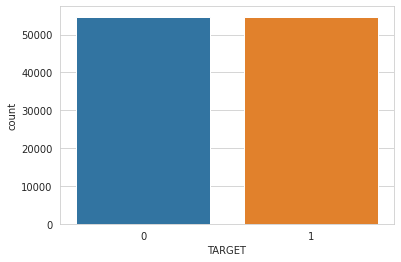

In [35]:
sns.set_style('whitegrid')
sns.countplot(y_over)

In [36]:
df_new = pd.read_csv('/content/drive/MyDrive/santander-customer-satisfaction/train.csv')

In [37]:
x = df.drop(['TARGET'], axis = 1)
y = df['TARGET']

In [38]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x, y, train_size = 0.8, random_state = 0, stratify = y)

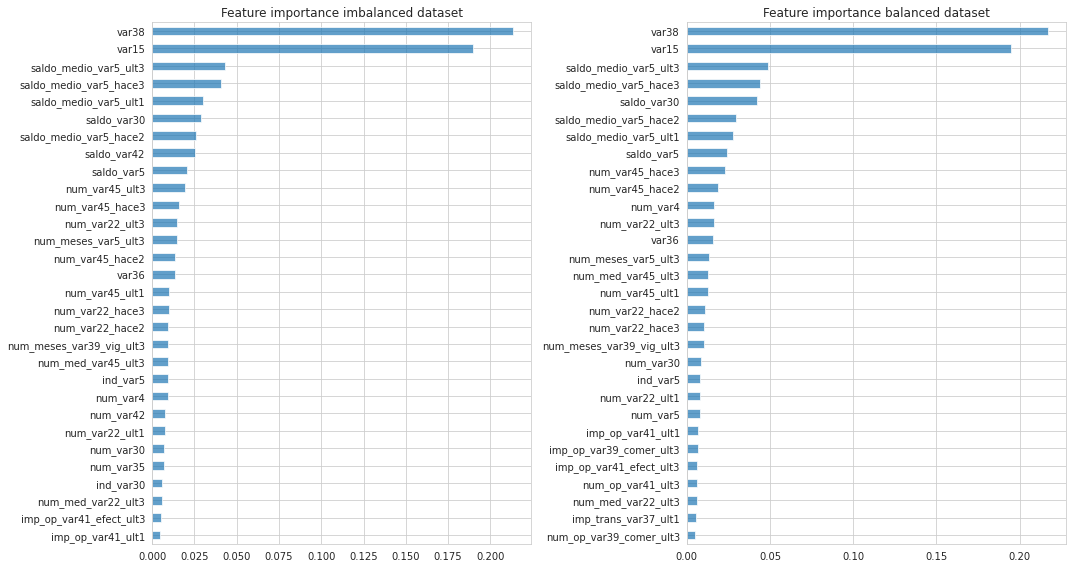

Performance with df_new dataset - cross validation: 0.7474929359628454 +- 0.013965216605944178, test data: 0.7567079425176322
Performance with df dataset - cross validation: 0.7525729619484076 +- 0.008572551823128487, test data: 0.7451910192888972


In [39]:
# Let's compare the results using df_new and df datasets

def feature_selection_rf(dataframe, X_train, y_train, X_test, y_test):

    rf = RandomForestClassifier(class_weight= 'balanced', random_state=42)
    rf.fit(X_train, y_train)
    
    # Preparing the data to plot
    feature_imp = pd.Series(data = rf.feature_importances_, index = X_train.columns)
    feature_imp.sort_values(ascending = True, inplace = True)
    
    # Evaluating train performance
    skf = StratifiedKFold(n_splits=5) #, random_state = 42
    val_cv = cross_val_score(estimator = rf, X = X_train, y= y_train, scoring = 'roc_auc', cv = skf)

    # Evaluating test performance 
    pred = rf.predict_proba(X_test)
    from sklearn.metrics import roc_auc_score
    p_test = roc_auc_score(y_test, pred[:,1])
    
    return feature_imp, val_cv, p_test

feature_imp_df_new, val_new_train, p_new_test = feature_selection_rf(df_new, x_new_train, y_new_train, x_new_test, y_new_test)
feature_imp_df, val_train, p_test = feature_selection_rf(df, X_train, y_train, X_test, y_test)

# Plot
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
feature_imp_df_new.tail(30).plot(kind = 'barh',  alpha = 0.7)
plt.title('Feature importance imbalanced dataset')
plt.subplot(1,2,2)
feature_imp_df.tail(30).plot(kind = 'barh',  alpha = 0.7)
plt.title('Feature importance balanced dataset')
plt.tight_layout()
plt.show()

# Evaluation
print('Performance with df_new dataset - cross validation: {} +- {}, test data: {}'.format(np.mean(val_new_train),
                                                                                           np.std(val_new_train),
                                                                                           p_new_test))
print('Performance with df dataset - cross validation: {} +- {}, test data: {}'.format(np.mean(val_train),
                                                                                 np.std(val_train),
                                                                                 p_test))

In [40]:
top_cols = feature_imp_df.tail(20)

In [41]:
top = ['num_var30','num_meses_var39_vig_ult3','num_var22_hace3','num_var22_hace2','num_var45_ult1','num_med_var45_ult3','num_meses_var5_ult3','var36','num_var22_ult3','num_var4','num_var45_hace2','num_var45_hace3','saldo_var5','saldo_medio_var5_ult1','saldo_medio_var5_hace2','saldo_var30','saldo_medio_var5_hace3','saldo_medio_var5_ult3','var15','var38']

In [42]:
df['var38'].value_counts()

117310.979016    10111
451931.220000       16
463625.160000       12
104563.800000       11
288997.440000       10
                 ...  
101249.580000        1
71010.540000         1
96572.550000         1
98387.970000         1
84278.160000         1
Name: var38, Length: 57736, dtype: int64

We will be looking at the top 5 features out of all the features that we have.

WOE IV:

In [43]:
train=X_train.copy()
train["TARGET"]=y_train.copy()

In [44]:
over_df = pd.concat([X_over, y_over], axis=1)

In [45]:
import pandas as pd
import scipy.stats as stats

class CategoricalFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature

    @property
    def df_lite(self):
        df_lite = self.df
        df_lite['bin'] = df_lite[self.feature].fillna('MISSING')
        return df_lite[['bin', 'TARGET']]


class ContinuousFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature
        self.bin_min_size = int(len(self.df) * 0.05)

    def __generate_bins(self, bins_num):
        df = self.df[[self.feature, 'TARGET']]
        df['bin'] = pd.qcut(df[self.feature], bins_num, duplicates='drop') \
                    .apply(lambda x: x.left) \
                    .astype(float)
        return df

    def __generate_correct_bins(self, bins_max=20):
        for bins_num in range(bins_max, 1, -1):
            df = self.__generate_bins(bins_num)
            df_grouped = pd.DataFrame(df.groupby('bin') \
                                      .agg({self.feature: 'count',
                                            'TARGET': 'sum'})) \
                                      .reset_index()
            r, p = stats.stats.spearmanr(df_grouped['bin'], df_grouped['TARGET'])

            if (
                    abs(r)==1 and                                                        # check if woe for bins are monotonic
                    df_grouped[self.feature].min() > self.bin_min_size                   # check if bin size is greater than 5%
                    and not (df_grouped[self.feature] == df_grouped['TARGET']).any()      # check if number of good and bad is not equal to 0
            ):
                break

        return df

    @property
    def df_lite(self):
        df_lite = self.__generate_correct_bins()
        df_lite['bin'].fillna('MISSING', inplace=True)
        return df_lite[['bin', 'TARGET']]

In [46]:
class AttributeRelevance():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def bulk_iv(self, feats, iv, woe_extremes=False):
        iv_dict = {}
        for f in feats:
            iv_df, iv_value = iv.calculate_iv(f)
            if woe_extremes:
                iv_dict[f.feature] = [iv_value, iv_df['woe'].min(), iv_df['woe'].max()]
                cols = ['iv', 'woe_min', 'woe_max']
            else:
                iv_dict[f.feature] = iv_value
                cols = ['iv']
        df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=cols)
        return df

    def bulk_stats(self, feats, s):
        stats_dict = {}
        for f in feats:
            p_value, effect_size = s.calculate_chi(f)
            stats_dict[f.feature] = [p_value, effect_size]
        df = pd.DataFrame.from_dict(stats_dict, orient='index', columns=['p-value', 'effect_size'])
        return df

    def analyze(self, feats, iv, s=None, interpretation=False):
        df_iv = self.bulk_iv(feats, iv).sort_values(by='iv', ascending=False)
        if s is not None:
            df_stats = self.bulk_stats(feats, s)
            df_iv = df_iv.merge(df_stats, left_index=True, right_index=True)
        if interpretation:
            df_iv['iv_interpretation'] = df_iv['iv'].apply(iv.interpretation)
            if s is not None:
                df_iv['es_interpretation'] = df_iv['effect_size'].apply(s.interpretation)
        return df_iv

    def draw_iv(self, feats, iv):
        df = self.analyze(feats, iv)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='iv', data=df, palette=self.seq_palette(len(feats)))
        ax.set_title('IV values')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_extremes(self, feats, iv):
        df = self.bulk_iv(feats, iv, woe_extremes=True).sort_values(by='iv', ascending=False)
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.barplot(x=df.index, y='woe_min', data=df, palette=self.seq_palette(len(feats)))
        sns.barplot(x=df.index, y='woe_max', data=df, palette=self.seq_palette(len(feats)))
        ax.axhline(y=0, color='black', linewidth=1)
        ax.set_title('Range of WOE values')
        ax.set_ylabel('WOE')
        plt.xticks(rotation=90)
        plt.show()

    def draw_woe_multiplot(self, feats, iv):
        n = len(feats)
        nrows = int(np.ceil(n/3))
        fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows*4))
        for i in range(n):
            iv_df, iv_value = iv.calculate_iv(feats[i])
            sns.barplot(x=feats[i].feature, y='woe', data=iv_df, color='#455872', ax=fig.axes[i])

        for ax in fig.axes:
            plt.sca(ax)
            plt.xticks(rotation=50)

        plt.tight_layout()
        plt.show()
        
class Analysis():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def group_by_feature(self, feat):
        #print(feat)
        df = feat.df_lite \
                            .groupby('bin') \
                            .agg({'TARGET': ['count', 'sum']}) \
                            .reset_index()
        df.columns = [feat.feature, 'count', 'good']
        df['bad'] = df['count'] - df['good']
        return df


class StatsSignificance(Analysis):
    def calculate_chi(self, feat):
        df = self.group_by_feature(feat)
        df_chi = np.array(df[['good', 'bad']])
        n = df['count'].sum()

        chi = stats.chi2_contingency(df_chi)
        cramers_v = np.sqrt(chi[0] / n)          # assume that k=2 (good, bad)
        return chi[1], cramers_v

    @staticmethod
    def interpretation(cramers_v):
        if cramers_v < 0.1:
            return 'useless'
        elif cramers_v < 0.2:
            return 'weak'
        elif cramers_v < 0.4:
            return 'medium'
        elif cramers_v < 0.6:
            return 'strong'
        else:
            return 'very strong'

    def interpret_chi(self, feat):
        _, cramers_v = self.calculate_chi(feat)
        return self.interpretation(cramers_v)

    def print_chi(self, feat):
        p_value, cramers_v = self.calculate_chi(feat)
        print('P-value: %0.2f\nEffect size: %0.2f' % (p_value, cramers_v))
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(cramers_v)))


class IV(Analysis):
    @staticmethod
    def __perc_share(df, group_name):
        return df[group_name] / df[group_name].sum()

    def __calculate_perc_share(self, feat):
        df = self.group_by_feature(feat)
        df['perc_good'] = self.__perc_share(df, 'good')
        df['perc_bad'] = self.__perc_share(df, 'bad')
        df['perc_diff'] = df['perc_good'] - df['perc_bad']
        return df

    def __calculate_woe(self, feat):
        df = self.__calculate_perc_share(feat)
        df['woe'] = np.log(df['perc_good']/df['perc_bad'])
        df['woe'] = df['woe'].replace([np.inf, -np.inf], np.nan).fillna(0)
        return df

    def calculate_iv(self, feat):
        df = self.__calculate_woe(feat)
        df['iv'] = df['perc_diff'] * df['woe']
        return df, df['iv'].sum()

    def draw_woe(self, feat):
        iv_df, iv_value = self.calculate_iv(feat)
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=feat.feature, y='woe', data=iv_df, palette=self.seq_palette(len(iv_df.index)))
        ax.set_title('WOE visualization for: ' + feat.feature)
        plt.show()
        plt.show()

    @staticmethod
    def interpretation(iv):
        if iv < 0.02:
            return 'useless'
        elif iv < 0.1:
            return 'weak'
        elif iv < 0.3:
            return 'medium'
        elif iv < 0.5:
            return 'strong'
        else:
            return 'suspicious'

    def interpret_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        return self.interpretation(iv)

    def print_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        print('Information value: %0.2f' % iv)
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(iv)))

In [47]:
s = StatsSignificance()
iv = IV()
ar = AttributeRelevance()

In [48]:
woe_iv_df = over_df[['saldo_var30' ,'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3' , 'var15', 'var38','TARGET']]

In [49]:
"TARGET" in woe_iv_df

True

In [50]:
from pandas.api.types import is_numeric_dtype

data_dict = {}

for col in [c for c in woe_iv_df.columns if c != 'TARGET']:
    if is_numeric_dtype(woe_iv_df[col]):
        data_dict[col] = ContinuousFeature(woe_iv_df, col)
    else:
        data_dict[col] = CategoricalFeature(woe_iv_df, col)

feats = list(data_dict.values())

In [51]:
df_analysis = ar.analyze(feats, iv, s, interpretation=True)
display(df_analysis)

,iv,p-value,effect_size,iv_interpretation,es_interpretation
var15,0.597686,0.0,0.372605,suspicious,medium
saldo_medio_var5_ult3,0.322820,0.0,0.280241,strong,medium
saldo_medio_var5_hace3,0.260515,0.0,0.252411,medium,medium
saldo_var30,0.136804,0.0,0.183757,medium,weak
var38,0.072483,0.0,0.133965,weak,weak


In [52]:
df_analysis.iv_interpretation.value_counts()

medium        2
suspicious    1
strong        1
weak          1
Name: iv_interpretation, dtype: int64

In [53]:
from pandas.api.types import is_numeric_dtype

data_dict = {}

for col in [c for c in over_df.columns if c != 'TARGET']:
    if is_numeric_dtype(over_df[col]):
        data_dict[col] = ContinuousFeature(over_df, col)
    else:
        data_dict[col] = CategoricalFeature(over_df, col)

feats = list(data_dict.values())

In [54]:
df_analysis_total = ar.analyze(feats, iv, s, interpretation=True)

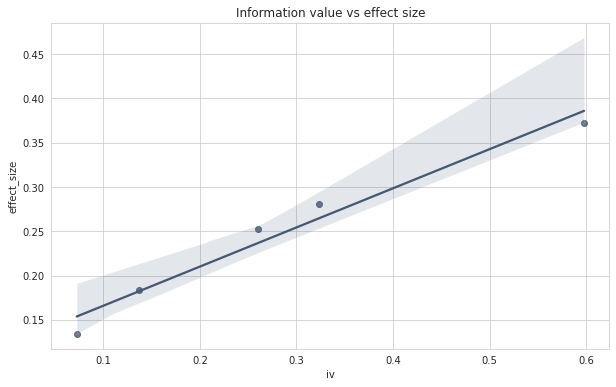

Pearson correlation: 0.98
Spearman correlation: 1.00


In [56]:
df_analysis_sign = df_analysis[df_analysis['p-value']<0.05]

fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x='iv', y='effect_size', data=df_analysis_sign, color='#455872')
ax.set_title('Information value vs effect size')
plt.show()

print('Pearson correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size']))
print('Spearman correlation: %0.2f' % df_analysis_sign['iv'].corr(df_analysis_sign['effect_size'], method='spearman'))

There is strong, almost linear, relationship between information value and effect size. Features with high information value have high effect size as well. Correlation coefficient for these values is: 0.98 (Pearson) and 1.0 (Spearman).

Although the interpretation of information value and effect size differs a bit, the rules are very similar: values closer to 0 imply very weak (or lack of) relationship, while higher values suggest stronger relation.

In [57]:
#iv of all the values that we have
df_analysis_total

,iv,p-value,effect_size,iv_interpretation,es_interpretation
var15,0.597686,0.0,0.372605,suspicious,medium
saldo_medio_var5_ult3,0.322820,0.0,0.280241,strong,medium
var36,0.298604,0.0,0.269802,medium,medium
num_meses_var5_ult3,0.288344,0.0,0.265123,medium,medium
saldo_medio_var5_hace3,0.260515,0.0,0.252411,medium,medium
...,...,...,...,...,...
num_op_var40_ult1,0.000000,1.0,0.000000,useless,useless
num_op_var41_hace3,0.000000,1.0,0.000000,useless,useless
num_op_var41_ult3,0.000000,1.0,0.000000,useless,useless
num_var31_0,0.000000,1.0,0.000000,useless,useless


In [58]:
df_analysis_total.iv_interpretation.value_counts()

useless       200
weak           13
medium          6
suspicious      1
strong          1
Name: iv_interpretation, dtype: int64

In [59]:
continuous = ['saldo_var30' ,'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3' , 'var15', 'var38']

In [60]:
over_df = pd.concat([X_over, y_over], axis=1)

In [61]:
from imblearn.over_sampling import RandomOverSampler

In [62]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

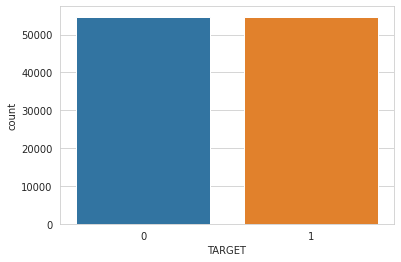

In [63]:
sns.set_style('whitegrid')
sns.countplot(y_resampled)

EDA on top variables:

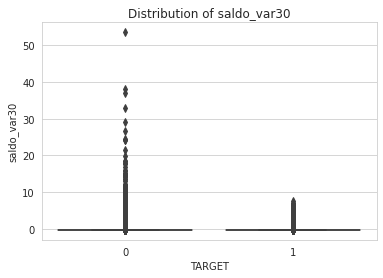

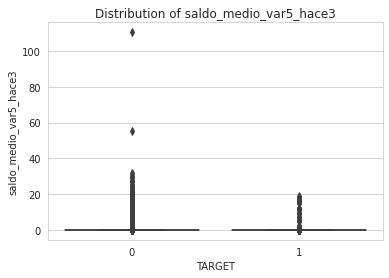

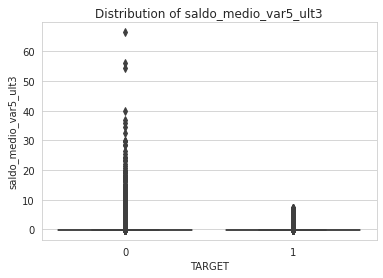

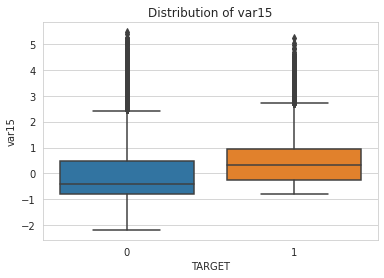

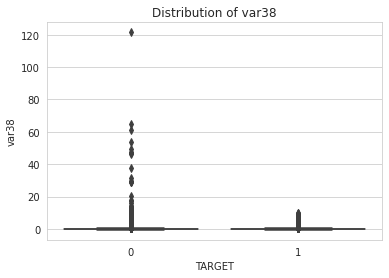

In [64]:
for col in continuous:
    sns.boxplot(data=over_df, y=col, x="TARGET")
    plt.title(f"Distribution of {col}")
    plt.show()

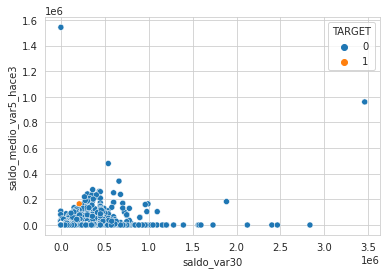

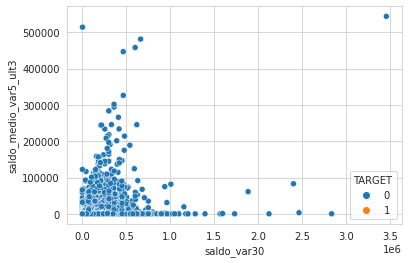

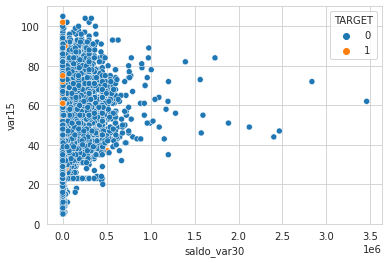

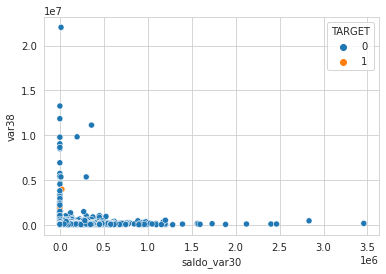

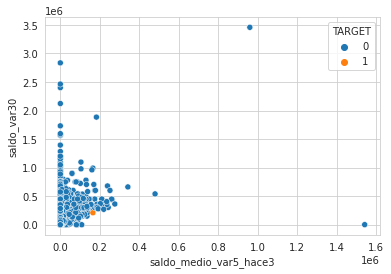

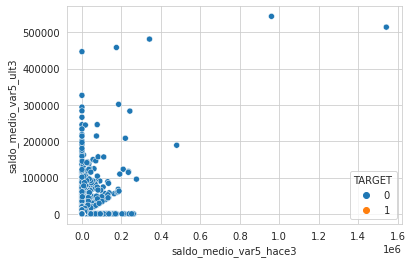

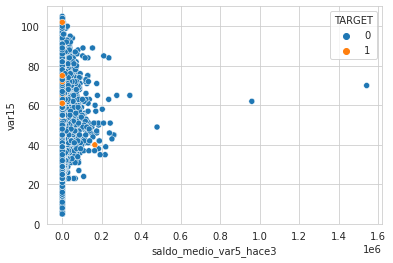

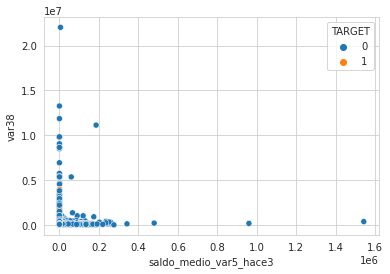

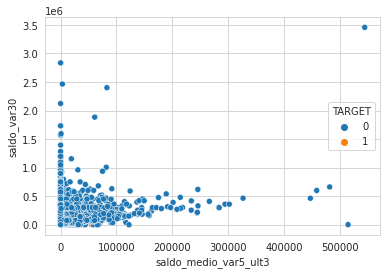

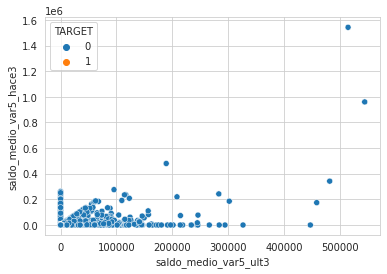

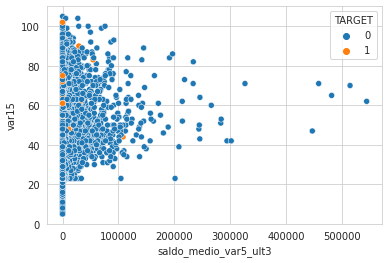

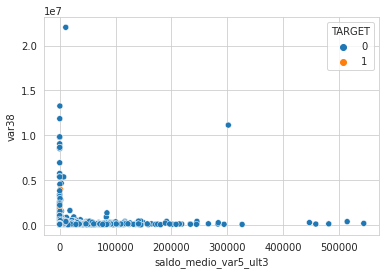

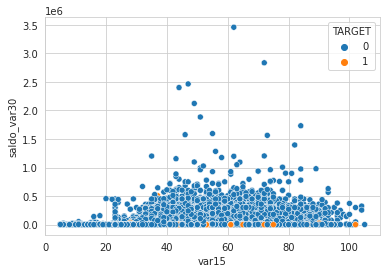

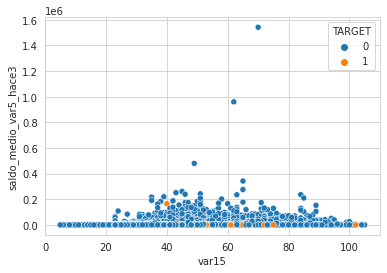

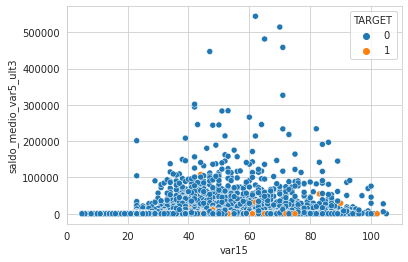

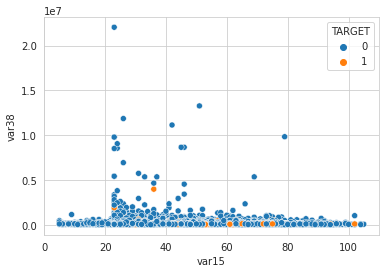

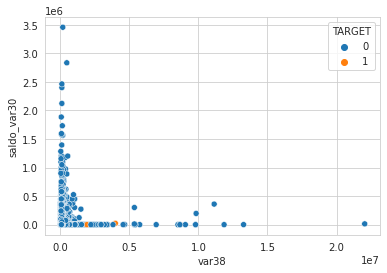

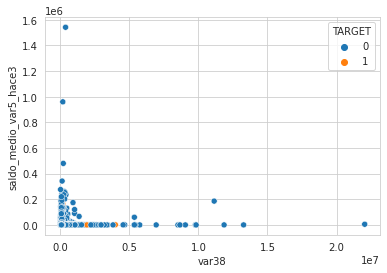

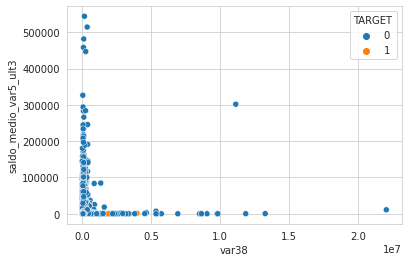

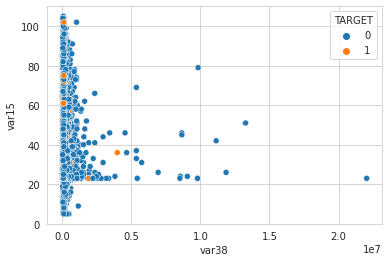

In [65]:
#correlations between the top features
for col in continuous:
    for second_col in continuous:
        if col != second_col:
            sns.scatterplot(df[col], df[second_col], hue=df["TARGET"])
            plt.xlabel(col)
            plt.ylabel(second_col)
            plt.show()

Logistic Regression:

In [66]:
#with imbalanced data
lr_b = LogisticRegression(random_state = 0, max_iter = 10000)
lr_b.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [67]:
y_pred = lr_b.predict(X_test)
lr_b_accuracy = accuracy_score(y_test, y_pred)
lr_b_auc = roc_auc_score(y_test, lr_b.predict_proba(X_test)[:,1])
lr_b_recall = recall_score(y_test, y_pred)
lr_b_f1 = f1_score(y_test, y_pred)

print(f'''Logistic Regression model trained using oversampled data 
accuracy = {lr_b_accuracy:.3f}
auc_score = {lr_b_auc:.3f}
recall = {lr_b_recall:.3f}
f1 = {lr_b_f1:.3f}''')

Logistic Regression model trained using oversampled data 
accuracy = 0.960
auc_score = 0.793
recall = 0.005
f1 = 0.010


In [68]:
#with balanced data
lr = LogisticRegression(random_state = 0, max_iter = 10000)
lr.fit(X_over, y_over)

LogisticRegression(max_iter=10000, random_state=0)

In [69]:
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

print(f'''Logistic Regression model trained using oversampled data 
accuracy = {lr_accuracy:.3f}
auc_score = {lr_auc:.3f}
recall = {lr_recall:.3f}
f1 = {lr_f1:.3f}''')

Logistic Regression model trained using oversampled data 
accuracy = 0.724
auc_score = 0.780
recall = 0.725
f1 = 0.172


In [70]:
'''
#on data with resampled values 
from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(class_weight='balanced')
class_weight = {0: 1, 1: 11}  # gives 11 times more weight to the minority class (label 1)
lr_r = LogisticRegression(class_weight=class_weight)
lr_r.fit(X_train, y_train)
y_pred = lr_r.predict(X_test)
lr_r_accuracy = accuracy_score(y_test, y_pred)
lr_r_auc = roc_auc_score(y_test, lr_r.predict_proba(X_test)[:,1])
lr_r_recall = recall_score(y_test, y_pred)
lr_r_f1 = f1_score(y_test, y_pred)

print(fLogistic Regression model trained using imbalanced data with higher class weight on minority
accuracy = {lr_r_accuracy:.3f}
auc_score = {lr_r_auc:.3f}
recall = {lr_r_recall:.3f}
f1 = {lr_r_f1:.3f})
'''

"\n#on data with resampled values \nfrom sklearn.linear_model import LogisticRegression\n#lr = LogisticRegression(class_weight='balanced')\nclass_weight = {0: 1, 1: 11}  # gives 11 times more weight to the minority class (label 1)\nlr_r = LogisticRegression(class_weight=class_weight)\nlr_r.fit(X_train, y_train)\ny_pred = lr_r.predict(X_test)\nlr_r_accuracy = accuracy_score(y_test, y_pred)\nlr_r_auc = roc_auc_score(y_test, lr_r.predict_proba(X_test)[:,1])\nlr_r_recall = recall_score(y_test, y_pred)\nlr_r_f1 = f1_score(y_test, y_pred)\n\nprint(fLogistic Regression model trained using imbalanced data with higher class weight on minority\naccuracy = {lr_r_accuracy:.3f}\nauc_score = {lr_r_auc:.3f}\nrecall = {lr_r_recall:.3f}\nf1 = {lr_r_f1:.3f})\n"

In [71]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, train_size = 0.8, random_state = 0)
x_train1 = x_over_train[top]
x_test1 = x_over_test[top]

In [72]:
#on top 20 features

lr_r = LogisticRegression(random_state = 0, max_iter = 10000)
lr_r.fit(x_train1, y_over_train)
y_pred = lr_r.predict(x_test1)
lr_r_accuracy = accuracy_score(y_over_test, y_pred)
lr_r_auc = roc_auc_score(y_over_test, lr_r.predict_proba(x_test1)[:,1])
lr_r_recall = recall_score(y_over_test, y_pred)
lr_r_f1 = f1_score(y_over_test, y_pred)

print(f'''Logistic Regression model trained using balanced data with top 20 features
accuracy = {lr_r_accuracy:.3f}
auc_score = {lr_r_auc:.3f}
recall = {lr_r_recall:.3f}
f1 = {lr_r_f1:.3f}''')

Logistic Regression model trained using balanced data with top 20 features
accuracy = 0.708
auc_score = 0.787
recall = 0.724
f1 = 0.713


In [73]:
X_train1 = X_train[top]
X_test1 = X_test[top]
lr_r1 = LogisticRegression(random_state = 0, max_iter = 10000)
lr_r1.fit(X_train1, y_train)
y_pred = lr_r.predict(X_test1)
lr_r1_accuracy = accuracy_score(y_test, y_pred)
lr_r1_auc = roc_auc_score(y_test, lr_r.predict_proba(X_test1)[:,1])
lr_r1_recall = recall_score(y_test, y_pred)
lr_r1_f1 = f1_score(y_test, y_pred)

print(f'''Logistic Regression model trained using imbalanced data with top 20 features
accuracy = {lr_r1_accuracy:.3f}
auc_score = {lr_r1_auc:.3f}
recall = {lr_r1_recall:.3f}
f1 = {lr_r1_f1:.3f}''')

Logistic Regression model trained using imbalanced data with top 20 features
accuracy = 0.697
auc_score = 0.789
recall = 0.725
f1 = 0.159


In [74]:
'''
y_prob = lr.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score and plot the ROC curve
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()
'''

'\ny_prob = lr.predict_proba(X_test)[:, 1]\n\n# Calculate the ROC AUC score and plot the ROC curve\nroc_auc = roc_auc_score(y_test, y_prob)\nfpr, tpr, thresholds = roc_curve(y_test, y_prob)\nplt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))\nplt.plot([0, 1], [0, 1], "k--", label="Random guess")\nplt.xlabel("False positive rate")\nplt.ylabel("True positive rate")\nplt.title("ROC curve")\nplt.legend(loc="best")\nplt.show()\n'

In [75]:
'''
#baseline decision tree algorithm
dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)

# Predict the probabilities of the positive class (class 1) on the testing data
y_prob = dtc.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score and plot the ROC curve
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend(loc="best")
plt.show()

# Evaluate the performance of the decision tree classifier model on the testing data
y_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1])
dtc_recall = recall_score(y_test, y_pred)
dtc_f1 = f1_score(y_test, y_pred)

print(fDecision Tree Classifier model trained using oversampled data 
accuracy = {dtc_accuracy:.3f}
auc_score = {dtc_auc:.3f}
recall = {dtc_recall:.3f}
f1 = {dtc_f1:.3f})
'''

'\n#baseline decision tree algorithm\ndtc = DecisionTreeClassifier()\ndtc.fit(X_over, y_over)\n\n# Predict the probabilities of the positive class (class 1) on the testing data\ny_prob = dtc.predict_proba(X_test)[:, 1]\n\n# Calculate the ROC AUC score and plot the ROC curve\nroc_auc = roc_auc_score(y_test, y_prob)\nfpr, tpr, thresholds = roc_curve(y_test, y_prob)\nplt.plot(fpr, tpr, label="ROC curve (AUC = {:.2f})".format(roc_auc))\nplt.plot([0, 1], [0, 1], "k--", label="Random guess")\nplt.xlabel("False positive rate")\nplt.ylabel("True positive rate")\nplt.title("ROC curve")\nplt.legend(loc="best")\nplt.show()\n\n# Evaluate the performance of the decision tree classifier model on the testing data\ny_pred = dtc.predict(X_test)\ndtc_accuracy = accuracy_score(y_test, y_pred)\ndtc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:,1])\ndtc_recall = recall_score(y_test, y_pred)\ndtc_f1 = f1_score(y_test, y_pred)\n\nprint(fDecision Tree Classifier model trained using oversampled data 

In [76]:
'''
clf_base = DecisionTreeClassifier(class_weight='balanced',random_state=42).fit(X_train, y_train)
plt.figure(figsize = (15,15))
plot_tree(clf_base, filled = True, rounded = True, class_names = ['Satisfied', 'Unsatisfied'], feature_names=x_new_train.columns)
plt.show()
'''

"\nclf_base = DecisionTreeClassifier(class_weight='balanced',random_state=42).fit(X_train, y_train)\nplt.figure(figsize = (15,15))\nplot_tree(clf_base, filled = True, rounded = True, class_names = ['Satisfied', 'Unsatisfied'], feature_names=x_new_train.columns)\nplt.show()\n"

clearly the model is overfitting

In [77]:
'''
# Training the model with different max_depth
tuned_param = {'max_depth': [1,2,3,4,5,6,10,20]}

# GridSearch
gridsh_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42), 
                     param_grid = tuned_param, 
                     scoring = 'roc_auc', 
                     cv = StratifiedKFold(5), n_jobs= -1).fit(X_over, y_over)
'''

"\n# Training the model with different max_depth\ntuned_param = {'max_depth': [1,2,3,4,5,6,10,20]}\n\n# GridSearch\ngridsh_dt = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = 'balanced', random_state = 42), \n                     param_grid = tuned_param, \n                     scoring = 'roc_auc', \n                     cv = StratifiedKFold(5), n_jobs= -1).fit(X_over, y_over)\n"

In [78]:
'''
dt_grid = pd.DataFrame(gridsh_dt.cv_results_)[['param_max_depth','mean_test_score','std_test_score']]
# Plot
fig, ax = plt.subplots()
ax.set_xlabel('max_depth')
ax.set_ylabel('ROC-AUC')
ax.errorbar('param_max_depth', 'mean_test_score', yerr = 'std_test_score',  marker = 'o', label = 'cross_validation', data = dt_grid)
ax.legend()
plt.show()
'''

"\ndt_grid = pd.DataFrame(gridsh_dt.cv_results_)[['param_max_depth','mean_test_score','std_test_score']]\n# Plot\nfig, ax = plt.subplots()\nax.set_xlabel('max_depth')\nax.set_ylabel('ROC-AUC')\nax.errorbar('param_max_depth', 'mean_test_score', yerr = 'std_test_score',  marker = 'o', label = 'cross_validation', data = dt_grid)\nax.legend()\nplt.show()\n"

In [79]:
'''
def roc_plot(predictions, labels, y_true):
    plt.figure(figsize=(8, 6))
    for i in range(len(predictions)):
        fpr, tpr, _ = roc_curve(y_true, predictions[i][:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# ROC Curve
predictions = [clf_base.predict_proba(X_test),
              gridsh_dt.best_estimator_.predict_proba(X_test)]
labels = ['clf_base', 'clf_opt_depth']
roc_plot(predictions, labels, y_test)
'''

"\ndef roc_plot(predictions, labels, y_true):\n    plt.figure(figsize=(8, 6))\n    for i in range(len(predictions)):\n        fpr, tpr, _ = roc_curve(y_true, predictions[i][:, 1])\n        roc_auc = auc(fpr, tpr)\n        plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')\n    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')\n    plt.xlim([0.0, 1.0])\n    plt.ylim([0.0, 1.0])\n    plt.xlabel('False Positive Rate')\n    plt.ylabel('True Positive Rate')\n    plt.title('Receiver Operating Characteristic (ROC) Curve')\n    plt.legend(loc='lower right')\n    plt.show()\n\n# ROC Curve\npredictions = [clf_base.predict_proba(X_test),\n              gridsh_dt.best_estimator_.predict_proba(X_test)]\nlabels = ['clf_base', 'clf_opt_depth']\nroc_plot(predictions, labels, y_test)\n"

In [80]:
'''
y_pred = gridsh_dt.best_estimator_.predict(X_test)
dtc_t_accuracy = accuracy_score(y_test, y_pred)
dtc_t_auc = roc_auc_score(y_test, gridsh_dt.best_estimator_.predict_proba(X_test)[:,1])
dtc_t_recall = recall_score(y_test, y_pred)
dtc_t_f1 = f1_score(y_test, y_pred)

print(fDecision Tree Classifier model trained using oversampled data 
accuracy = {dtc_accuracy:.3f}
auc_score = {dtc_auc:.3f}
recall = {dtc_recall:.3f}
f1 = {dtc_f1:.3f})
'''

'\ny_pred = gridsh_dt.best_estimator_.predict(X_test)\ndtc_t_accuracy = accuracy_score(y_test, y_pred)\ndtc_t_auc = roc_auc_score(y_test, gridsh_dt.best_estimator_.predict_proba(X_test)[:,1])\ndtc_t_recall = recall_score(y_test, y_pred)\ndtc_t_f1 = f1_score(y_test, y_pred)\n\nprint(fDecision Tree Classifier model trained using oversampled data \naccuracy = {dtc_accuracy:.3f}\nauc_score = {dtc_auc:.3f}\nrecall = {dtc_recall:.3f}\nf1 = {dtc_f1:.3f})\n'

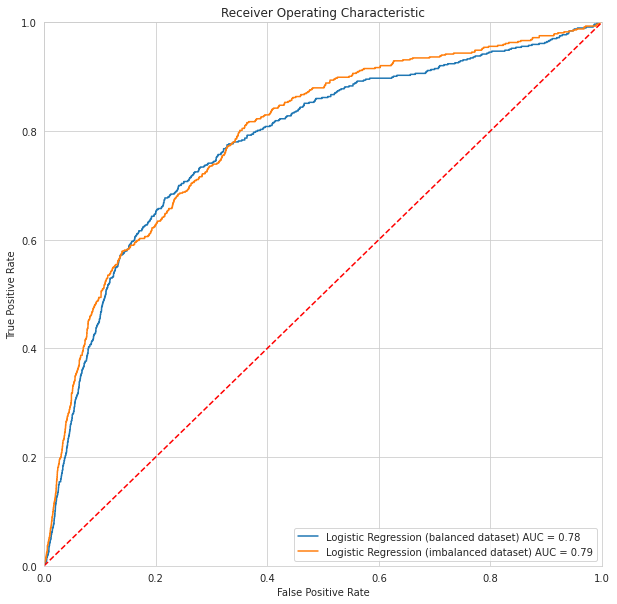

In [81]:
## ROC curve plot of models
plt.rcParams['font.size'] = '10'
plt.figure(figsize=(10,10))

model_dict =  {
    "Logistic Regression (balanced dataset)": lr,
    "Logistic Regression (imbalanced dataset)" : lr_b,
}

for model_name, model_obj in model_dict.items():
  probs = model_obj.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(y_test, preds)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f'{model_name} AUC = %0.2f' % roc_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_Curve.png")
plt.show()


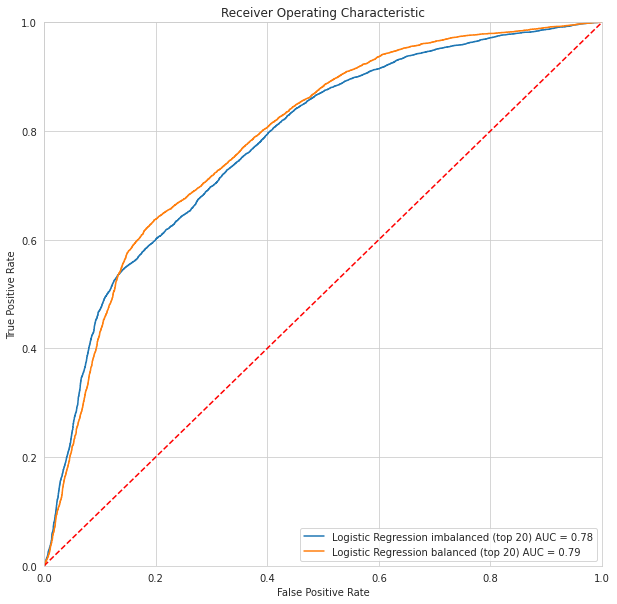

In [82]:
## ROC curve plot of models (top 20)
plt.rcParams['font.size'] = '10'
plt.figure(figsize=(10,10))

model_dict =  {
    "Logistic Regression imbalanced (top 20)" : lr_r1,
    "Logistic Regression balanced (top 20)" : lr_r
}

for model_name, model_obj in model_dict.items():
  probs = model_obj.predict_proba(x_test1)
  preds = probs[:,1]
  fpr, tpr, threshold = roc_curve(y_over_test, preds)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f'{model_name} AUC = %0.2f' % roc_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC_Curve.png")
plt.show()


In [83]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ["Strategy","Accuracy","F1 Score","Recall","AUC score"]
pt.add_row(["Logistic Regression - with class imbalanced dataset",round(lr_b_accuracy,3),round(lr_b_f1,3),round( lr_b_recall,3),round(lr_b_auc,3)])
pt.add_row(["Logistic Regression - with class balanced dataset (SMOTE)",round(lr_accuracy,3),round(lr_f1,3),round( lr_recall,3),round( lr_auc,3)])
pt.add_row(["Logistic Regression - with class balanced dataset on top 20 features",round(lr_r_accuracy,3),round(lr_r_f1,3),round( lr_r_recall,3),round( lr_auc,3)])
pt.add_row(["Logistic Regression - with class imbalanced dataset on top 20 features",round(lr_r1_accuracy,3),round(lr_r1_f1,3),round( lr_r1_recall,3),round( lr_r1_auc,3)])

In [84]:
print(pt)

+------------------------------------------------------------------------+----------+----------+--------+-----------+
|                                Strategy                                | Accuracy | F1 Score | Recall | AUC score |
+------------------------------------------------------------------------+----------+----------+--------+-----------+
|          Logistic Regression - with class imbalanced dataset           |   0.96   |   0.01   | 0.005  |   0.793   |
|       Logistic Regression - with class balanced dataset (SMOTE)        |  0.724   |  0.172   | 0.725  |    0.78   |
|  Logistic Regression - with class balanced dataset on top 20 features  |  0.708   |  0.713   | 0.724  |    0.78   |
| Logistic Regression - with class imbalanced dataset on top 20 features |  0.697   |  0.159   | 0.725  |   0.789   |
+------------------------------------------------------------------------+----------+----------+--------+-----------+


Based on the table shown above, it can be concluded that accuracy is not the most reliable parameter to assess the model's performance. This is because accuracy does not consider the presence of class imbalances.

More appropriate metrics to evaluate the model's performance are the f1-score and AUC score. 
